# Laboratorio 7: Filtrado de las señales del dataset

### 1. Cargando el dataset y escogiendo señales de ejemplo

{'data': array([[508., 508., 508., ..., 495., 492., 490.],
       [488., 486., 484., ..., 487., 485., 483.],
       [480., 479., 477., ..., 478., 477., 476.],
       ...,
       [558., 554., 551., ..., 611., 611., 607.],
       [604., 603., 600., ..., 561., 563., 563.],
       [564., 570., 576., ..., 535., 533., 532.]]), 'target': array([0, 0, 0, ..., 2, 2, 2]), 'target_names': array(['basal', 'respiration', 'post-exercise'], dtype='<U13')}


Text(0.5, 1.0, 'Ejemplo en agitación')

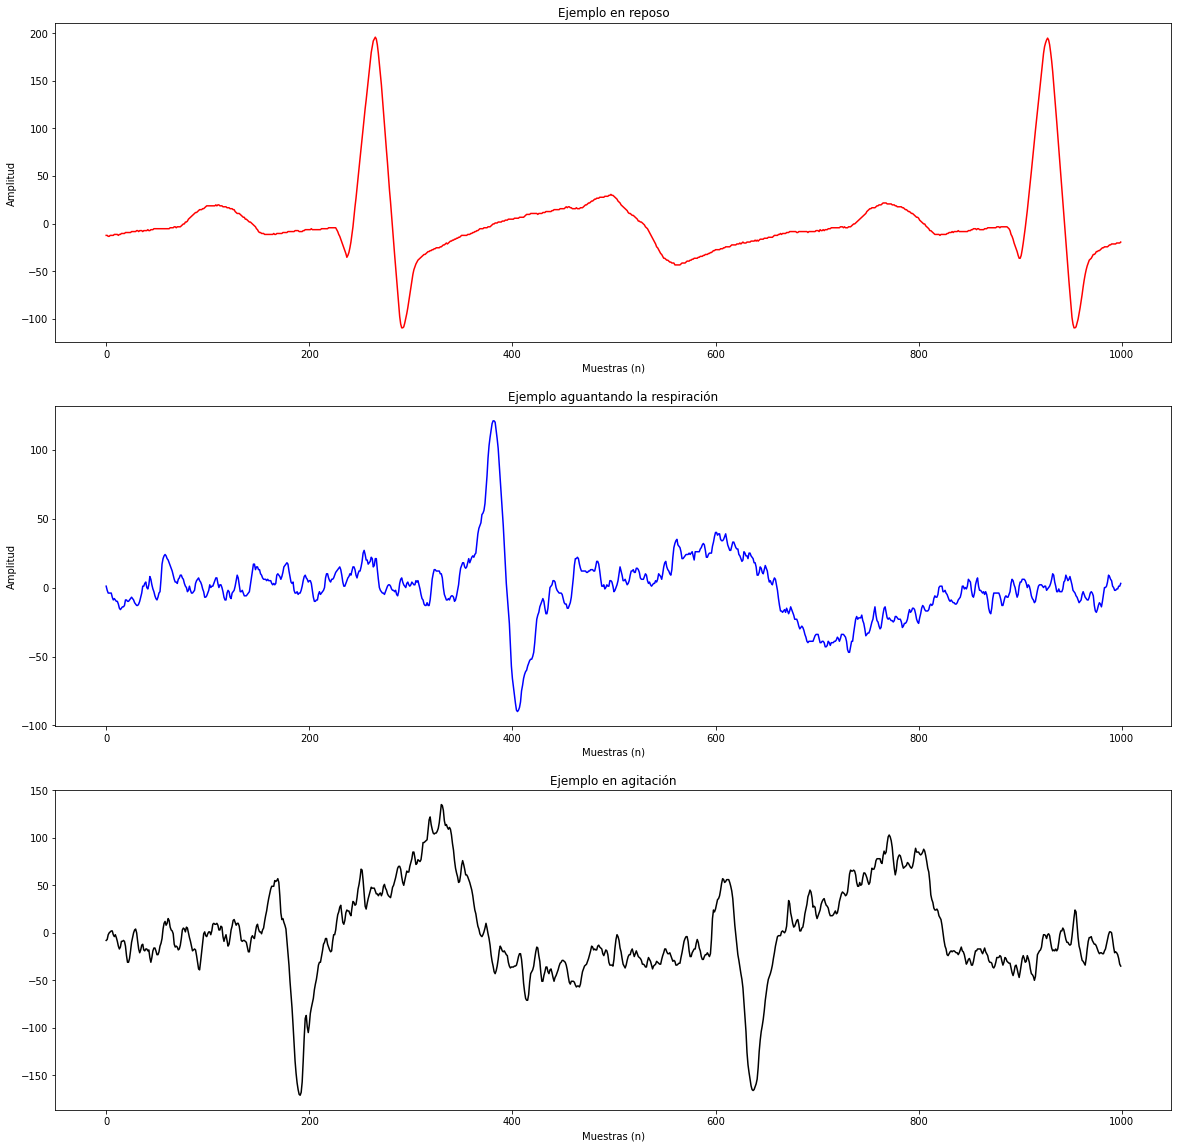

In [61]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
with np.load('dataset.npz') as data:
    ecg = {key: data[key] for key in data.keys()}
print(ecg)
data = ecg['data']
samp_data_reposo = data[40]
samp_data_resp_a = data[250]
samp_data_agit = data[300]
samp_data_reposo = samp_data_reposo - np.mean(samp_data_reposo)
samp_data_resp_a = samp_data_resp_a - np.mean(samp_data_resp_a)
samp_data_agit = samp_data_agit - np.mean(samp_data_agit)

n= np.arange(len(samp_data_reposo))

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(n, samp_data_reposo,'r'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud")
plt.title("Ejemplo en reposo")
plt.subplot(3, 1, 2);plt.plot(n, samp_data_resp_a, 'b'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud")
plt.title("Ejemplo aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(n, samp_data_agit, 'k'); plt.xlabel( 'Muestras (n)')
plt.title("Ejemplo en agitación")


### 2. Ploteando en el dominio de la frecuencia

Text(0.5, 1.0, 'Agitado')

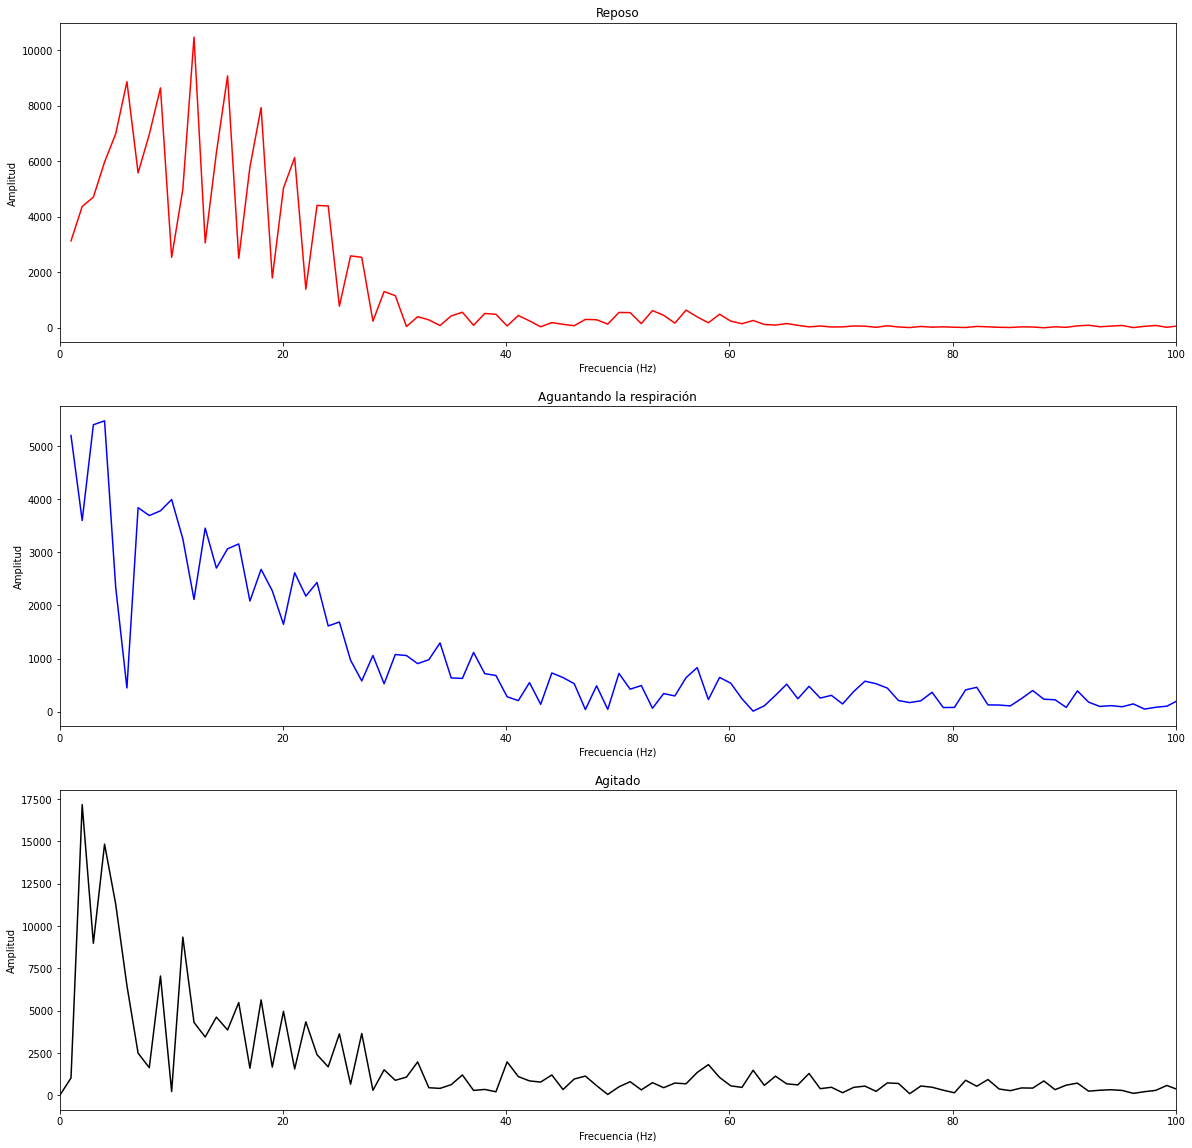

In [62]:
Fs=1000
N=len(n)
SAMP1 = np.fft.fft(samp_data_reposo)
SAMP1 = SAMP1 [0:N//2]
SAMP2 = np.fft.fft(samp_data_resp_a)
SAMP2  = SAMP2 [0:N//2]
SAMP3 = np.fft.fft(samp_data_agit)
SAMP3  = SAMP3 [0:N//2]

#f = n*Fs/(N-1) - Fs/2
f= np.linspace(0,Fs/2,N//2)
#f = np.fft.fftshift(f)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(f[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(f, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Agitado")


### 3. Diseño de filtro pasabajas IIR de tipo butterworth y función de transferencia

Text(0, 0.5, 'Magnitud (db)')

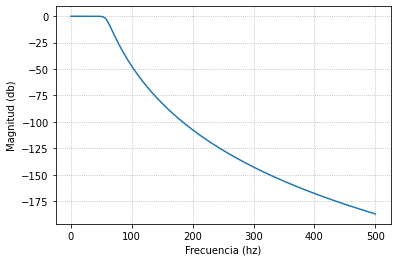

In [63]:
Wc = 58*2*np.pi
b,a = signal.butter(10, Wc, 'lowpass', True, 'ba')
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

### 4. Aplicación del filtro IIR en la señal

Text(0.5, 1.0, 'Agitado')

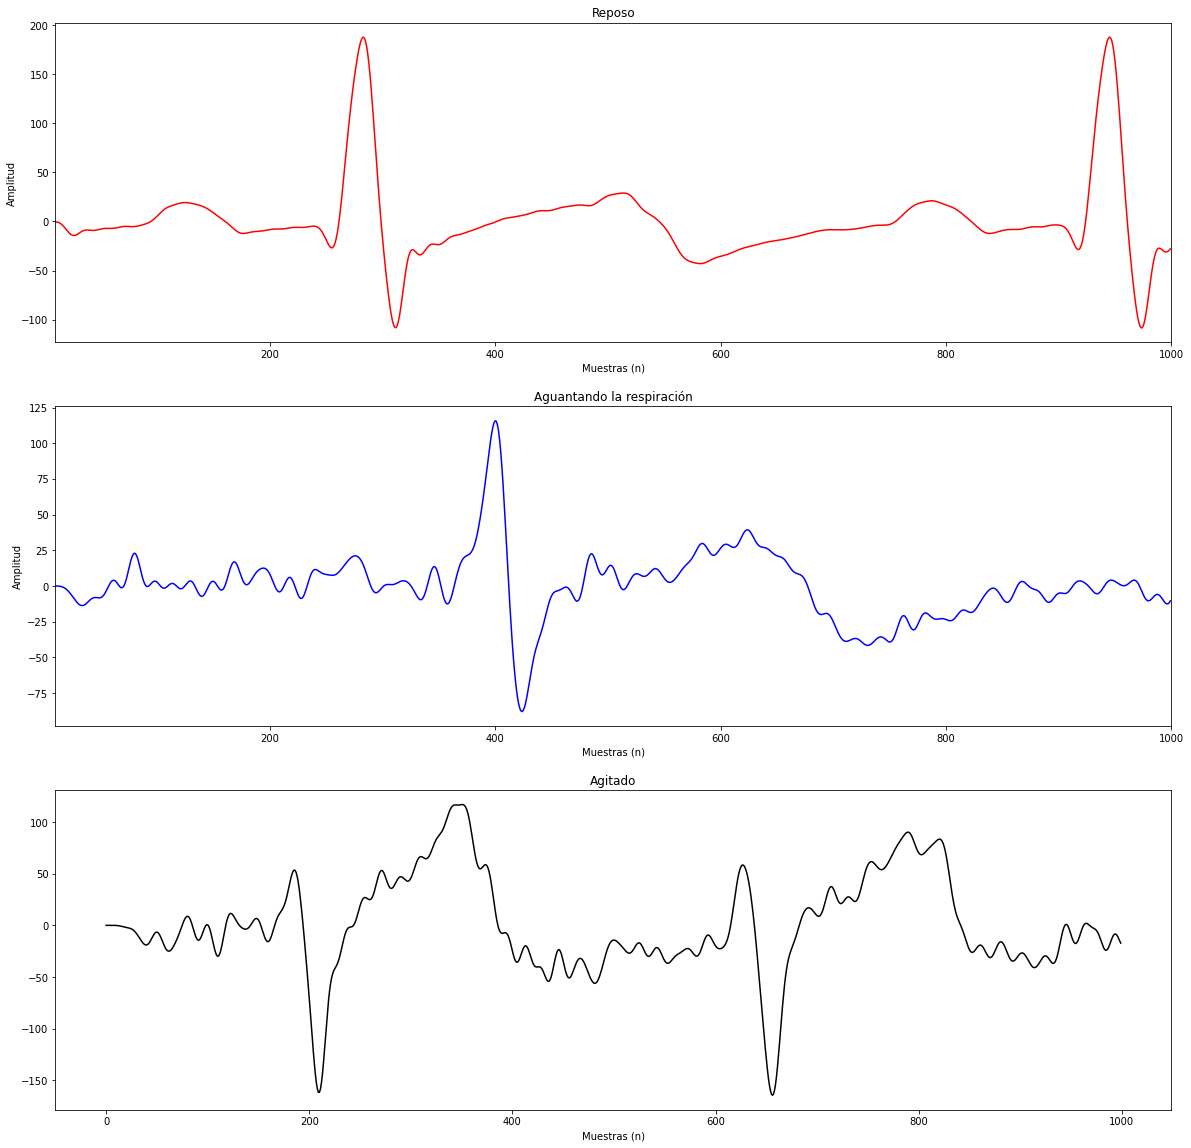

In [64]:
bd, ad = signal.bilinear(b,a,Fs)
samp_data_reposo_filt = signal.lfilter(bd,ad, samp_data_reposo) 
samp_data_resp_a_filt = signal.lfilter(bd,ad, samp_data_resp_a) 
samp_data_agit_filt = signal.lfilter(bd,ad, samp_data_agit)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(samp_data_reposo_filt,'r'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(samp_data_resp_a_filt, 'b'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(samp_data_agit_filt, 'k'); plt.xlabel( 'Muestras (n)')
plt.title("Agitado")

### 4. Dominio de frecuencia de la señal filtrada

Text(0.5, 1.0, 'Agitado')

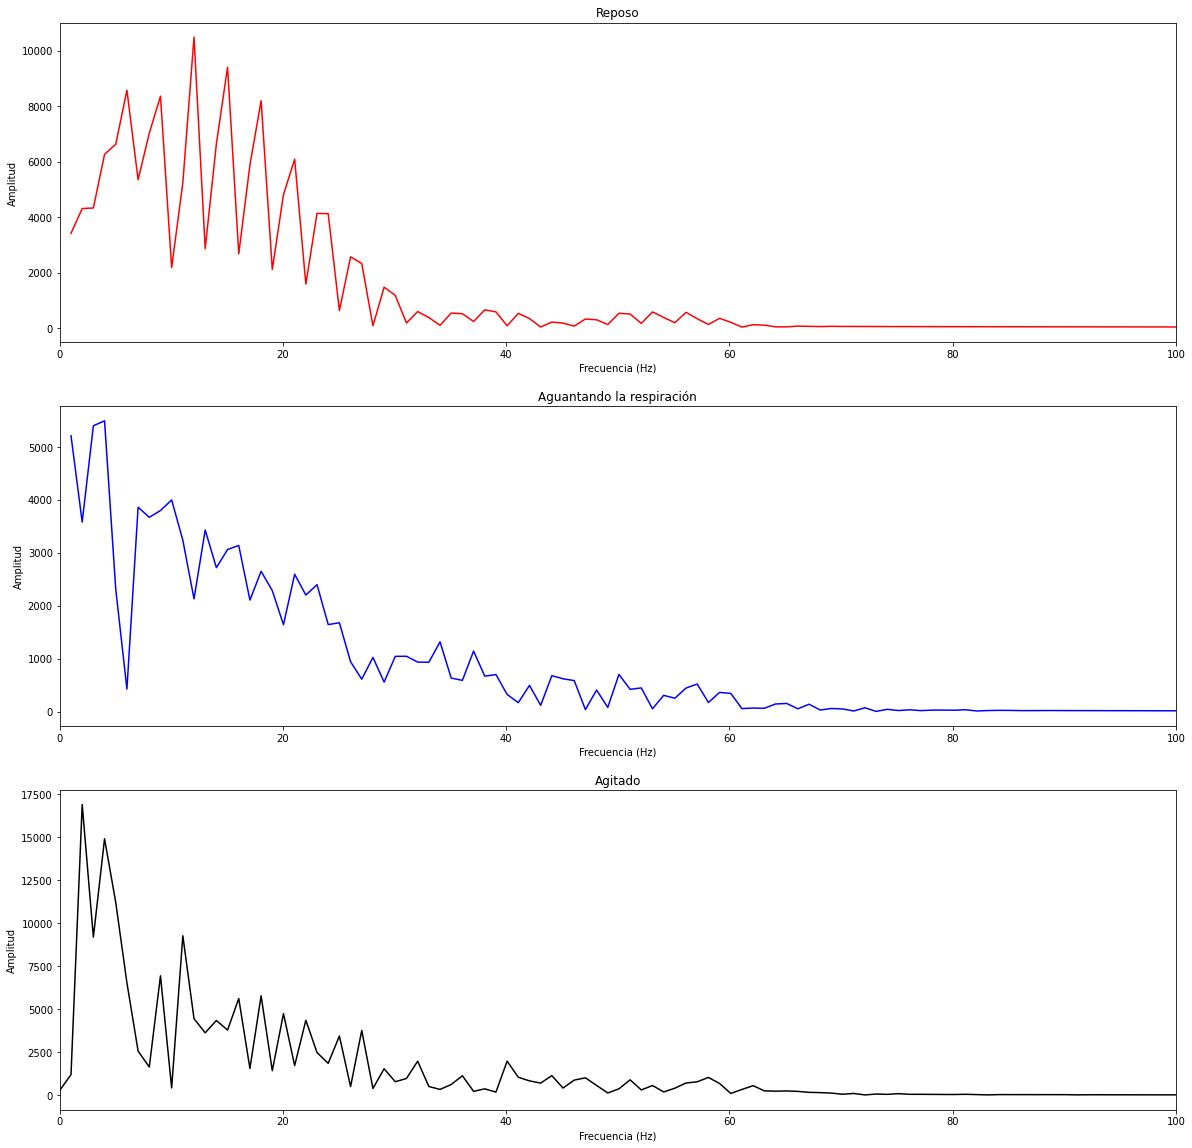

In [65]:

N=len(n)
SAMP1 = np.fft.fft(samp_data_reposo_filt)
SAMP1 = SAMP1 [0:N//2]
SAMP2 = np.fft.fft(samp_data_resp_a_filt)
SAMP2  = SAMP2 [0:N//2]
SAMP3 = np.fft.fft(samp_data_agit_filt)
SAMP3  = SAMP3 [0:N//2]

#f = n*Fs/(N-1) - Fs/2
f= np.linspace(0,Fs/2,N//2)
#f = np.fft.fftshift(f)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(f[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(f, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Agitado")

### 5. Diseño de filtro FIR con ventana hamming

C:\Users\eduma\AppData\Local\Temp/ipykernel_7188/1092116715.py:12: RuntimeWarning: divide by zero encountered in log10
  h_freq_db = 20 * np.log10(abs(h_freq))


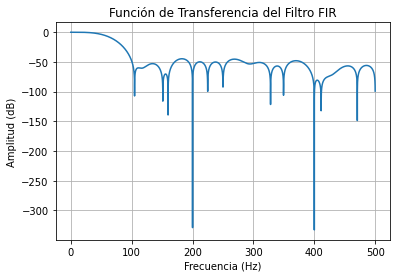

In [72]:
#longitud de la ventana
M = 40
#frecuencia de corte en Hz
Fc = 58

# filtro fir
w = signal.firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)
w_freq, h_freq = signal.freqz(w, worN=8000)

# Convierte a dB y escala la frecuencia a Hz
h_freq_db = 20 * np.log10(abs(h_freq))
w_freq_hz = w_freq * Fs / (2 * np.pi)

# Gráfica de la función de transferencia
plt.figure()
plt.plot(w_freq_hz, h_freq_db)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.title('Función de Transferencia del Filtro FIR')
plt.grid(True)
plt.show()

### 6. Aplicación del filtro FIR en la señal

Text(0.5, 1.0, 'Agitado')

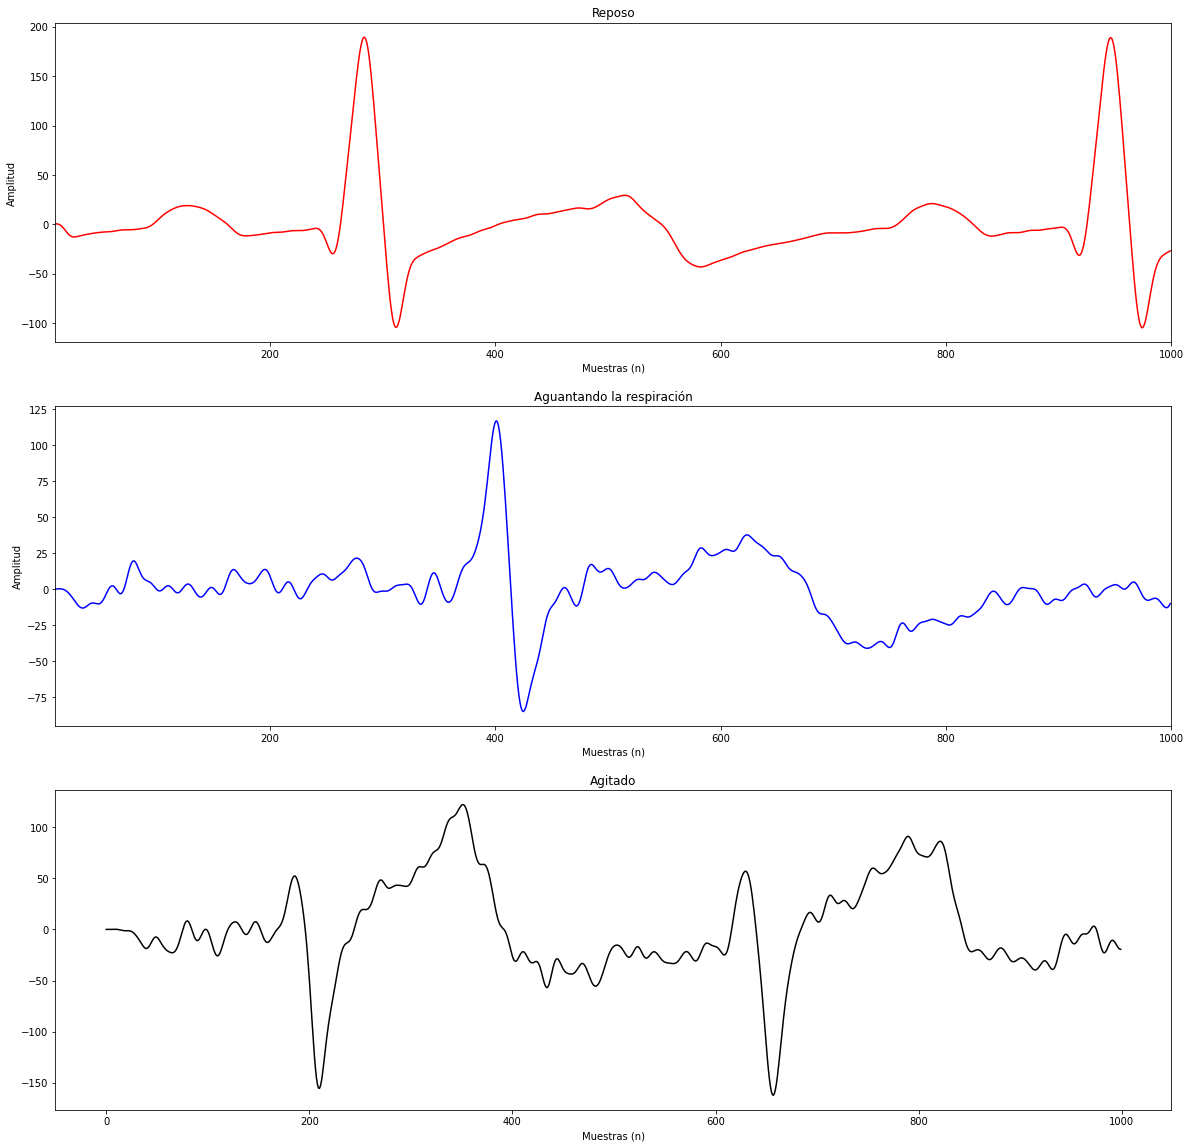

In [73]:

bd, ad = signal.bilinear(b,a,Fs)
samp_data_reposo_filt_fir = signal.lfilter(w, np.array(1),samp_data_reposo)
samp_data_resp_a_filt_fir = signal.lfilter(w,np.array(1), samp_data_resp_a) 
samp_data_agit_filt_fir = signal.lfilter(w,np.array(1), samp_data_agit)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(samp_data_reposo_filt_fir,'r'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(samp_data_resp_a_filt_fir, 'b'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(samp_data_agit_filt_fir, 'k'); plt.xlabel( 'Muestras (n)')
plt.title("Agitado")


### Comparación de filtros FIR e IIR

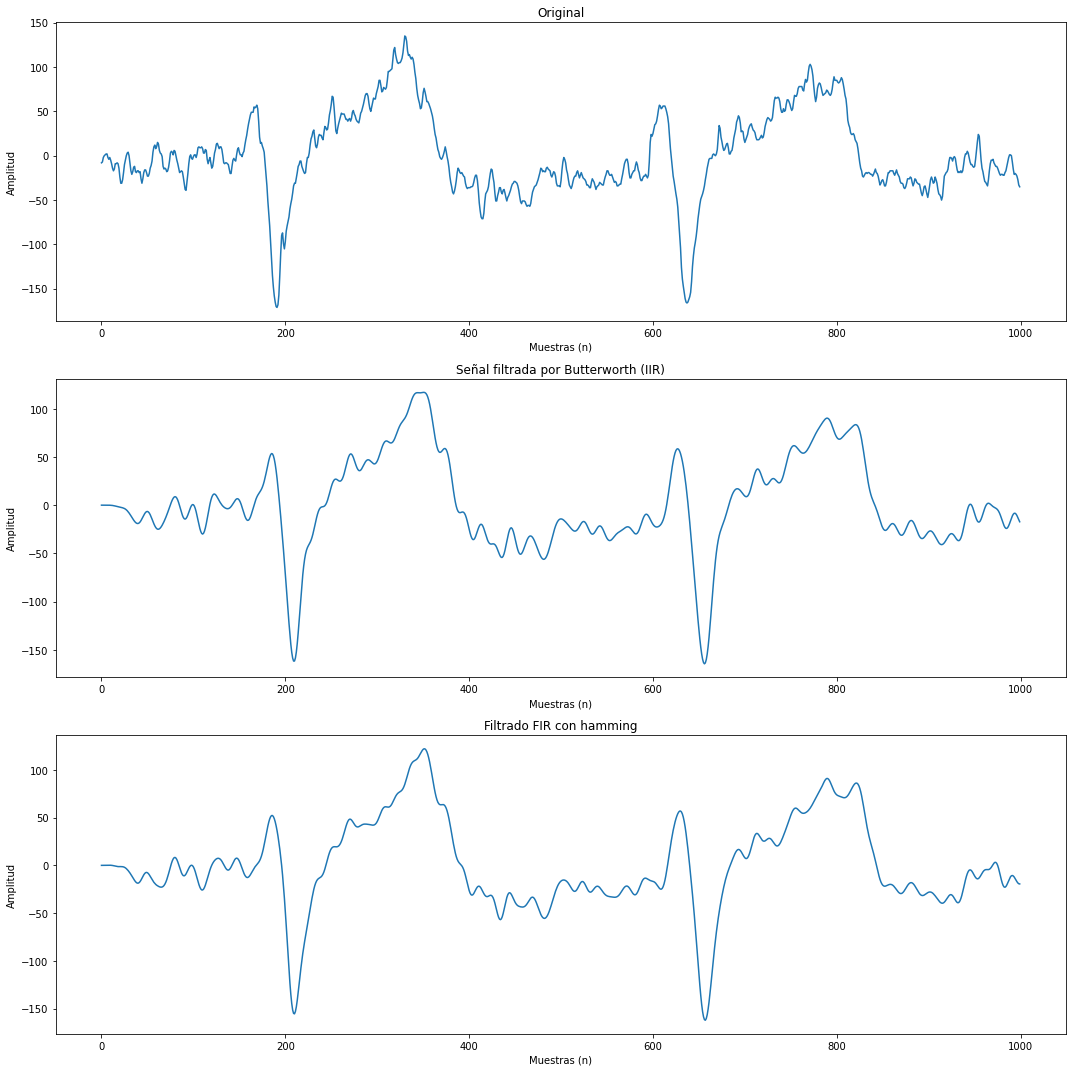

In [74]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(samp_data_agit);plt.title("Original")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 1,2)
plt.title("Señal filtrada por Butterworth (IIR)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(samp_data_agit_filt)
plt.subplot(3, 1, 3)
plt.plot(samp_data_agit_filt_fir);plt.title("Filtrado FIR con hamming")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.tight_layout()


### Comparación completa de las señales filtradas por filtros de tipo IIR o FIR

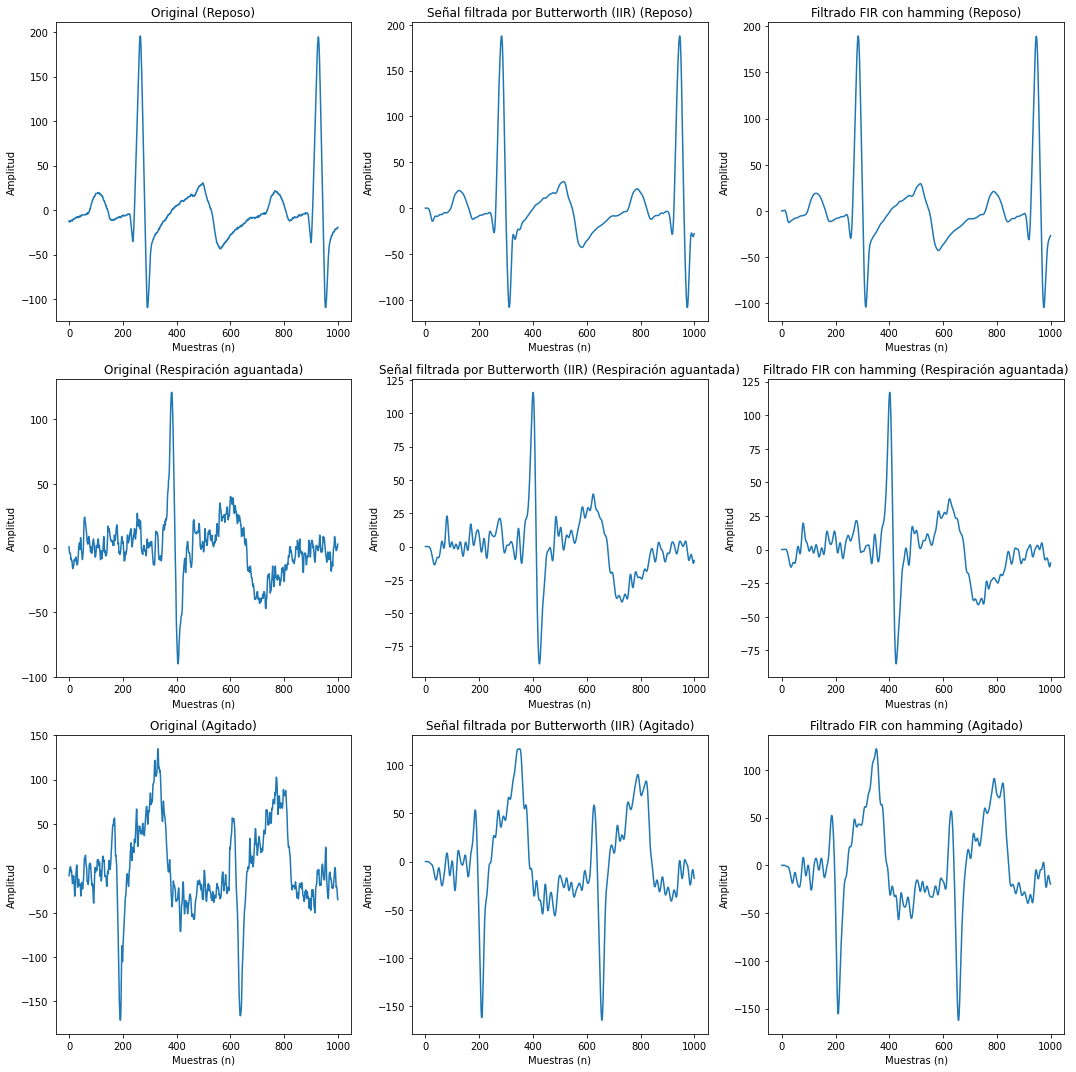

In [48]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.plot(samp_data_reposo);plt.title("Original (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,2)
plt.title("Señal filtrada por Butterworth (IIR) (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(samp_data_reposo_filt)
plt.subplot(3, 3, 3)
plt.plot(samp_data_reposo_filt_fir);plt.title("Filtrado FIR con hamming (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 4)
plt.plot(samp_data_resp_a);plt.title("Original (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,5)
plt.title("Señal filtrada por Butterworth (IIR) (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(samp_data_resp_a_filt)
plt.subplot(3, 3, 6)
plt.plot(samp_data_resp_a_filt_fir);plt.title("Filtrado FIR con hamming (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 7)
plt.plot(samp_data_agit);plt.title("Original (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,8)
plt.title("Señal filtrada por Butterworth (IIR) (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(samp_data_agit_filt)
plt.subplot(3, 3, 9)
plt.plot(samp_data_agit_filt_fir);plt.title("Filtrado FIR con hamming (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
fig = plt.gcf()
fig.set_facecolor('white')
plt.tight_layout()

### Filtrado de todo el dataset con el filtro IIR


In [91]:
with np.load('dataset.npz') as data:
    ecg = {key: data[key] for key in data.keys()}
data = ecg['data']
print("Original data")
print(data)
filtered_data = np.zeros(data.shape)
for i, row in enumerate(data):
    offset = np.mean(row)
    centered_row = row - offset
    new_row = signal.lfilter(bd,ad, centered_row) + offset
    filtered_data[i] = new_row
filtered_data = filtered_data.round(2)
ecg['data'] = filtered_data
print("New filtered dataset")
print(ecg)
np.savez('dataset_filt.npz', **ecg)

Original data
[[508. 508. 508. ... 495. 492. 490.]
 [488. 486. 484. ... 487. 485. 483.]
 [480. 479. 477. ... 478. 477. 476.]
 ...
 [558. 554. 551. ... 611. 611. 607.]
 [604. 603. 600. ... 561. 563. 563.]
 [564. 570. 576. ... 535. 533. 532.]]
New filtered dataset
{'data': array([[510.35, 510.35, 510.35, ..., 514.85, 514.14, 513.43],
       [507.28, 507.28, 507.28, ..., 514.06, 513.3 , 512.53],
       [507.19, 507.19, 507.19, ..., 509.15, 508.26, 507.27],
       ...,
       [503.69, 503.69, 503.69, ..., 580.65, 579.61, 578.84],
       [503.32, 503.32, 503.32, ..., 559.34, 559.46, 559.04],
       [507.15, 507.15, 507.15, ..., 543.15, 544.54, 545.99]]), 'target': array([0, 0, 0, ..., 2, 2, 2]), 'target_names': array(['basal', 'respiration', 'post-exercise'], dtype='<U13')}
